In [1]:
import networkx as nx


Q1

In [2]:
# Function random.random generates a random number in the [0, 1) interval
# We can use it to simulate the outcome of a Bernoulli variable:
import random
if random.random() < 0.5:
    print ("Heads")
else:
    print ("Tails")

Tails


In [3]:
# An alternative to random.random is scipy.stats.bernoulli.rvs:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.2)
bernoulli.rvs(p=0.2, size=20)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

<IPython.core.display.Javascript object>


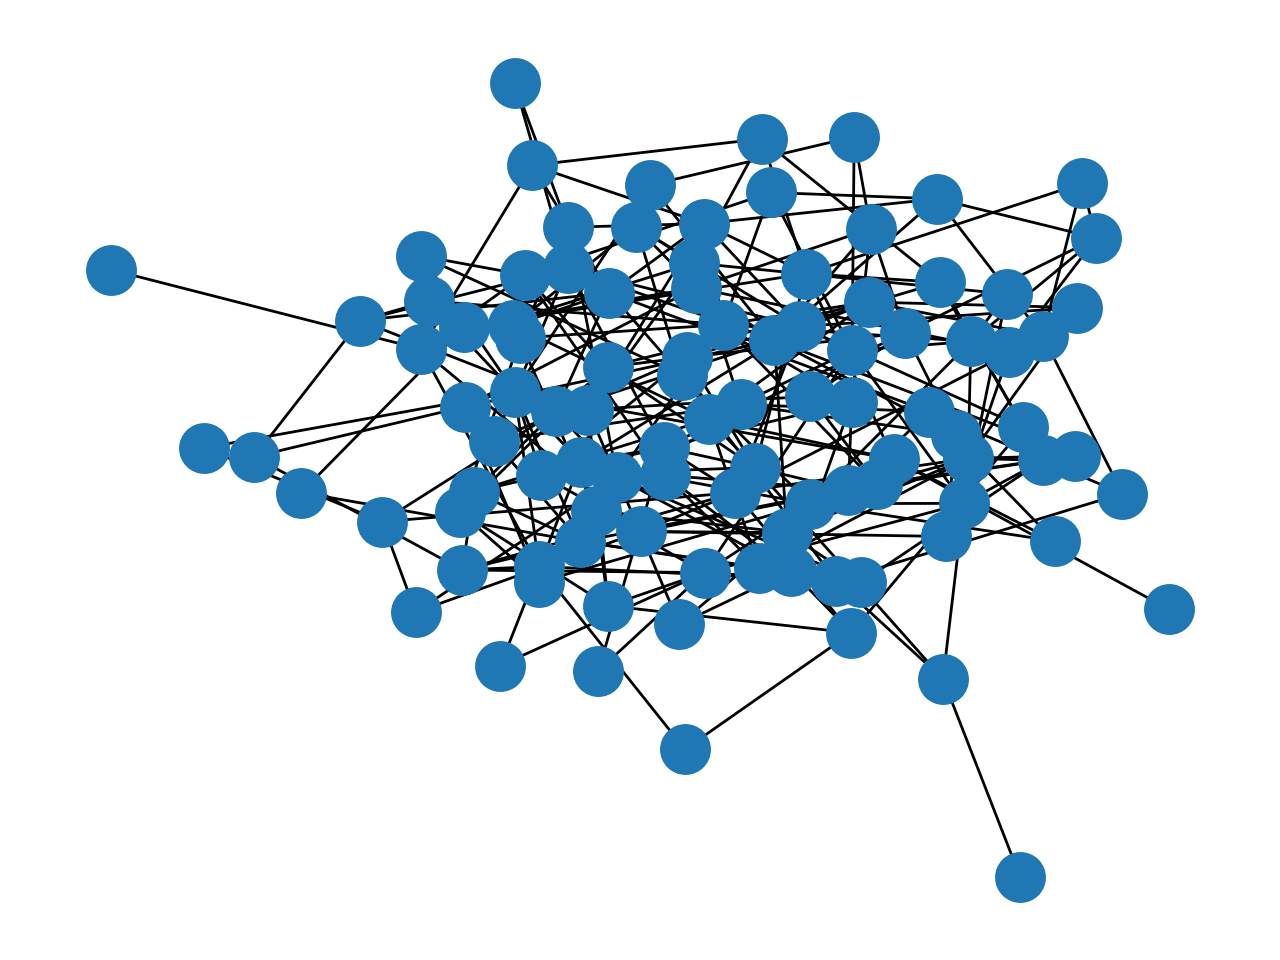

In [8]:
# generate a graph from the G(N, p) ensemble (the classic Erdos-Rényi graph) 
# need two parameters: the number of nodes N and the connection probability p
import matplotlib.pyplot as plt
%matplotlib notebook
G1 = nx.Graph()
N, p = 100, 0.05
G1.add_nodes_from(range(N))

for i in range(N):
    for j in range(i+1, N):
        if bernoulli.rvs(p=p):
            G1.add_edge(i, j)
nx.draw(G1, with_labels=False)


Q2

In [5]:
G = nx.erdos_renyi_graph(20, 0.15, seed=123)
nx.draw(G)

<IPython.core.display.Javascript object>


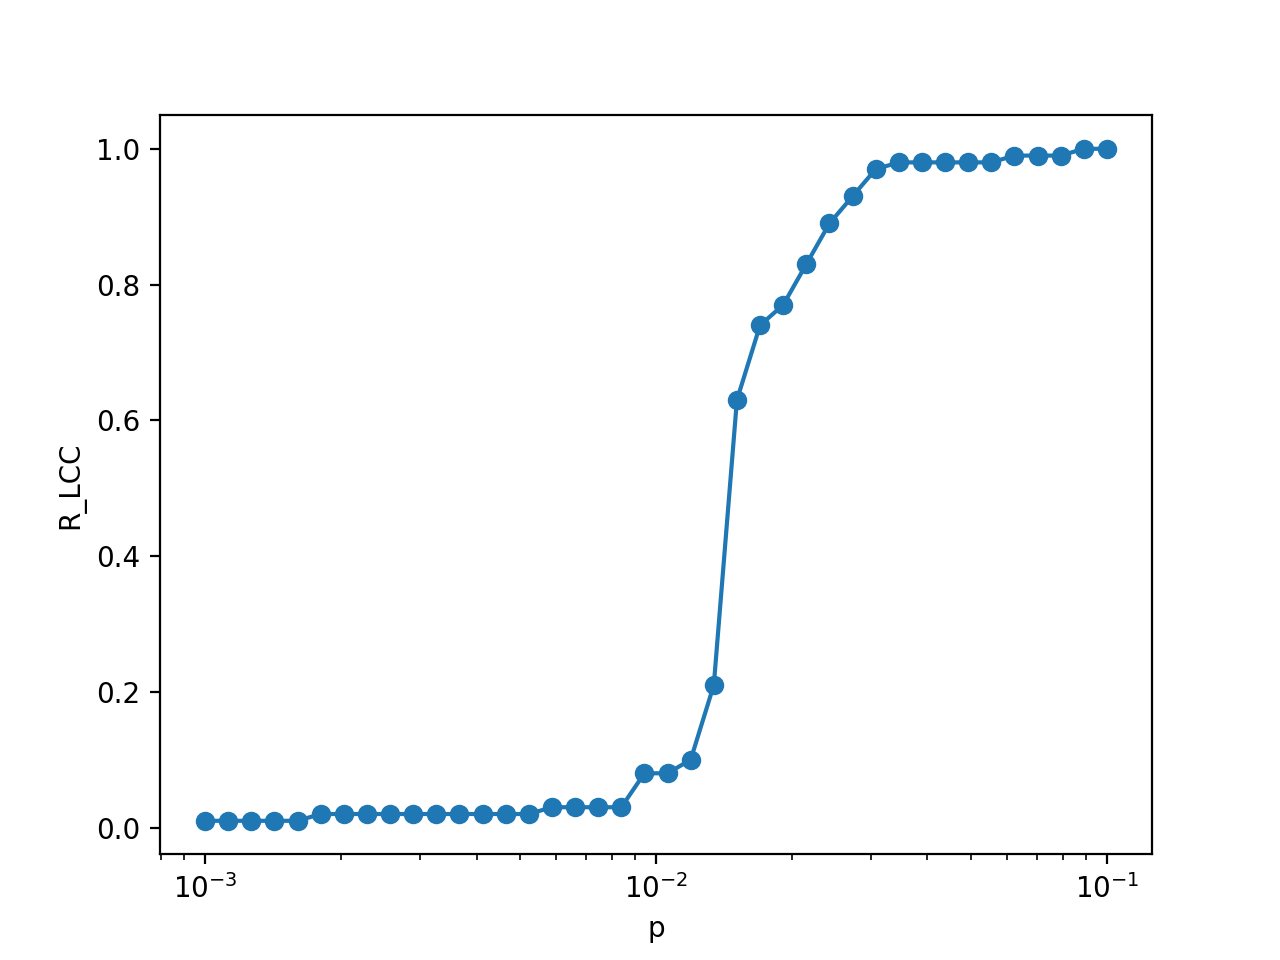

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
N=100
realizations = 10
seed = 123
phase = []
# create a NumPy array (a type of sequence) of evenly spaced p values
# using ps = np.logspace(-np.log10(N)-1, -np.log10(N)+1, 40)
ps = np.logspace(-np.log10(N)-1, -np.log10(N)+1, 40)

for p in ps:
    # create a list of the average clustering coefficients for each realization
    clustering_coeffs = []
    for i in range(realizations):
        G = nx.erdos_renyi_graph(N, p, seed=seed)
        Gc = len(max(nx.connected_components(G)))
        clustering_coeffs.append(Gc/N)
    phase.append(np.mean(clustering_coeffs)) # calculate the mean of a sequence using the np.mean function
    

# create a semi-logarithmic plot using the plt.semilogx function
plt.semilogx(ps, phase, 'o-')
plt.xlabel('p')
plt.ylabel('R_LCC')
plt.show()